In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
DATA_CSV = '../data/history/flightsHistory.csv.gz'
data = pd.read_csv(DATA_CSV)
data.head()

/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_99761/702289898.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_CSV)


,Row,flight_iata,airline_iata,dep_time_utc,dep_actual_utc,arr_time_utc,arr_actual_utc,dep_iata,arr_iata,dep_country_code,...,dep_rain,dep_snowfall,dep_weather_code,dep_cloud_cover,dep_cloud_cover_low,dep_cloud_cover_mid,dep_cloud_cover_high,dep_wind_speed_10m,dep_wind_speed_100m,dep_wind_gusts_10m
0,0,vn30,vn,2022-10-17 14:35:00,2022-10-17 14:54:00,2022-10-18 07:55:00,2022-10-18 06:59:00,FRA,SGN,DE,...,0.0,0.0,3.0,82.199997,53.0,9.0,97.0,6.297428,13.708390,18.000000
1,1,qh74,qh,2022-10-17 20:10:00,2022-10-17 20:31:00,2022-10-18 12:50:00,2022-10-18 12:02:00,FRA,HAN,DE,...,0.0,0.0,2.0,78.000000,0.0,93.0,74.0,6.638072,13.551500,11.520000
2,2,vj910,vj,2022-10-18 01:25:00,2022-10-18 02:45:00,2022-10-18 07:45:00,NaN,BOM,HAN,IN,...,0.2,0.0,51.0,76.200005,22.0,44.0,100.0,3.219938,5.116561,9.000000
3,3,qr970,qr,2022-10-18 02:35:00,2022-10-18 03:03:00,2022-10-18 14:25:00,2022-10-18 14:07:00,DOH,SGN,QA,...,0.0,0.0,0.0,9.900001,0.0,0.0,33.0,11.966953,20.523155,17.280001
4,4,tk162,tk,2022-10-18 02:45:00,2022-10-18 02:40:00,2022-10-18 17:05:00,2022-10-18 16:06:00,IST,SGN,TR,...,0.0,0.0,2.0,61.199997,68.0,0.0,0.0,26.987997,39.463947,46.439999


Find average delay time for each day

In [3]:
data['dep_date'] = pd.to_datetime(data['dep_time_utc']).dt.date
date_n_delay = data[['dep_date', 'delayed', 'holiday']].copy()
avg_delay_per_date = date_n_delay.groupby('dep_date')['delayed'].mean()
avg_delay_per_date

dep_date
2022-10-17   -52.000000
2022-10-18    -2.957950
2022-10-19     2.374359
2022-10-20    -1.907432
2022-10-21    -0.067651
                ...    
2023-11-27    -2.941330
2023-11-28    -3.981408
2023-11-29    -6.583969
2023-11-30     1.034437
2023-12-01    -0.857143
Name: delayed, Length: 411, dtype: float64

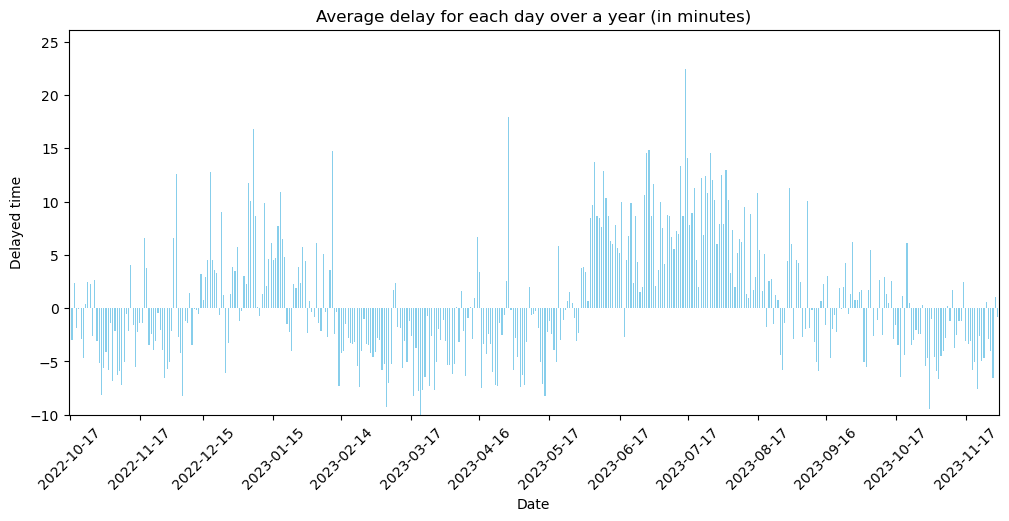

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))
avg_delay_per_date.plot(kind='bar', color='skyblue', ax=ax)

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator())

# Set the lower bound of the y-axis to -10
ax.set_ylim(bottom=-10)

# Add labels and title
plt.title('Average delay for each day over a year (in minutes)')
plt.xlabel('Date')
plt.ylabel('Delayed time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [12]:
# Get holiday information; boolean
date_n_delay['holiday_bool'] = ~date_n_delay['holiday'].isna()
all_holidays = date_n_delay[date_n_delay['holiday_bool']]['dep_date']
# holidays_delay = holidays.groupby('dep_date')['delayed'].mean()
# holidays_delay
all_holidays

779       2022-10-19
1159      2022-10-19
1274      2022-10-19
1343      2022-10-19
1451      2022-10-19
             ...    
346009    2023-10-31
346010    2023-10-31
346011    2023-10-31
346017    2023-10-31
346020    2023-10-31
Name: dep_date, Length: 30741, dtype: object

In [13]:
def plot_holidays(avg_delay_per_date, holidays): 
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot average delay as a bar chart
    ax.bar(avg_delay_per_date.index, avg_delay_per_date, color='skyblue', width=0.4, label='Average Delay')

    # Scatter plot for holiday dates
    ax.scatter(holidays, [0] * len(holidays), color='RoyalBlue', marker='o', label='Holidays', s=10)

    # Set the locator for the x-axis to show only the first day of each month
    ax.xaxis.set_major_locator(MonthLocator())

    # Set the lower bound of the y-axis to -10
    ax.set_ylim(bottom=-10)

    # Add labels and title
    plt.title('Average delay for each day over a year (in minutes)')
    plt.xlabel('Date')
    plt.ylabel('Delayed time')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    ax.legend()
    plt.show()

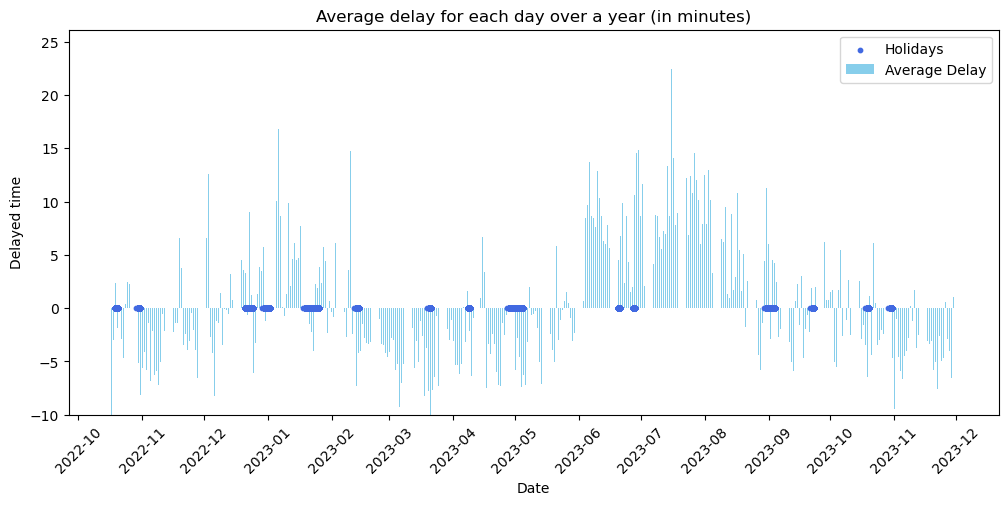

In [14]:
plot_holidays(avg_delay_per_date, all_holidays)

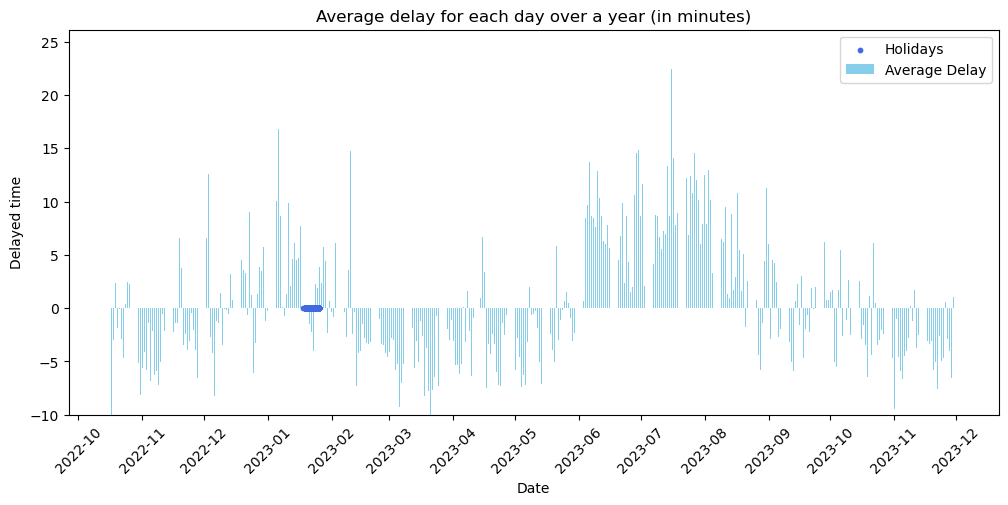

In [17]:
lunar_NYs = data[data.holiday == 'Lunar New Year']['dep_date']
plot_holidays(avg_delay_per_date, lunar_NYs)